In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import csv
import xgboost
import matplotlib.pyplot as plt

from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn import svm
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
def metricas(y_true, y_pred):
  # Accuracy 
  acc = metrics.accuracy_score(y_true, y_pred)
  # Precision - tp / (tp+fp)
  prec = metrics.precision_score(y_true,y_pred, average='weighted')
  # Recall - tp / (tp + fn)
  rec = metrics.recall_score(y_true, y_pred, average='weighted')
  # F1 - 2 * (precision * recall) / (precision + recall)
  f1 = metrics.f1_score(y_true,y_pred, average='weighted')

  print("Métricas de avaliação:")
  print("Accuracy: ", acc,"\nPrecision: ", prec, "\nRecall: ", rec, "\nF1: ", f1)
  
  print("\nMatriz de confusão:")
  confusion_matrix = pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'])
  sns.heatmap(confusion_matrix, annot = True)

In [3]:
trainDF = pd.read_csv('dataset/train_students.csv')
testDF = pd.read_csv('dataset/test_students.csv')

In [4]:
dups_train=trainDF.duplicated()

In [5]:
trainDF.drop_duplicates(inplace=True)

In [6]:
categorical_features = ['protocol_type', 'service', 'flag']
for feature in categorical_features:
    le = LabelEncoder()
    trainDF[feature] = le.fit_transform(trainDF[feature])
    testDF[feature] = le.fit_transform(testDF[feature])

In [7]:
# Create a label encoder object
le_attack_type = LabelEncoder()

# Define the mapping
attack_type_mapping = {'normal': 0, 'Dos': 1, 'R2L': 2, 'U2R': 3, 'Probe': 4}

# Fit the label encoder to the attack_type feature
le_attack_type.fit(trainDF['attack_type'])

# Transform the attack_type feature using the label encoder and the defined mapping
trainDF['attack_type'] = trainDF['attack_type'].map(attack_type_mapping)

#Normal->0
#DoS->1
#R2L->2
#U2R->3
#Probe->4

In [8]:
testDF.shape

(44556, 42)

In [9]:
trainDF.drop('num_outbound_cmds', axis=1, inplace=True)
testDF.drop('num_outbound_cmds', axis=1, inplace=True)
trainDF.shape

(103657, 41)

In [10]:
testDF.shape

(44556, 41)

In [11]:
X = trainDF.iloc[:,:-1].values
y = trainDF.iloc[:, -1].values
X.shape

(103657, 40)

In [12]:
transform=VarianceThreshold(0.1)
X=transform.fit_transform(X)
X.shape

(103657, 25)

In [13]:
X_testing=testDF[testDF.columns[1:41]]
transform=VarianceThreshold(0.1)
X_testing=transform.fit_transform(X_testing)
X_testing.shape

(44556, 25)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

minority_class = np.min(np.bincount(y_train))
smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print(X_train.shape)
print(X_test.shape)

(215680, 25)
(20732, 25)


In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_testing = scaler.transform(X_testing)

# Regression

## Linear

In [16]:
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predict target variable using trained model
y_pred = reg.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Evaluate the model using MAE
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Evaluate the model using R-squared
r2 = metrics.r2_score(y_test, y_pred)
print("R-squared:", r2)

rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

Mean Squared Error: 1.2992412069049957
Mean Absolute Error: 0.8386384172545436
R-squared: 0.051838583752079725
RMSE: 1.1398426237446095


## Ridge

In [19]:
alpha = 1.0  # regularization strength
reg = Ridge(alpha=alpha)
reg.fit(X_train, y_train)

# Predict target variable using trained model
y_pred = reg.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Evaluate the model using MAE
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Evaluate the model using R-squared
r2 = metrics.r2_score(y_test, y_pred)
print("R-squared:", r2)

rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

Mean Squared Error: 1.2992448616975707
Mean Absolute Error: 0.8386489943580065
R-squared: 0.05183591655426789
RMSE: 1.1398442269440026


## Lasso

In [20]:
alpha = 0.01  # regularization strength
reg = Lasso(alpha=alpha)
reg.fit(X_train, y_train)

# Predict target variable using trained model
y_pred = reg.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Evaluate the model using MAE
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Evaluate the model using R-squared
r2 = metrics.r2_score(y_test, y_pred)
print("R-squared:", r2)

rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

Mean Squared Error: 1.3319926265094404
Mean Absolute Error: 0.8644096502062433
R-squared: 0.027937223303194925
RMSE: 1.1541198492831843


## Elastic Net

In [21]:
alpha = 0.01  # regularization strength
l1_ratio = 0.5  # mix between L1 and L2 regularization
reg = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
reg.fit(X_train, y_train)

# Predict target variable using trained model
y_pred = reg.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Evaluate the model using MAE
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Evaluate the model using R-squared
r2 = metrics.r2_score(y_test, y_pred)
print("R-squared:", r2)

rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

Mean Squared Error: 1.3212383470186373
Mean Absolute Error: 0.8580232276783659
R-squared: 0.03578549106020079
RMSE: 1.149451324336371


# Ensemble

## Random Forest

Métricas de avaliação:
Accuracy:  0.9952730079104766 
Precision:  0.9953612909153418 
Recall:  0.9952730079104766 
F1:  0.9953067607693014

Matriz de confusão:


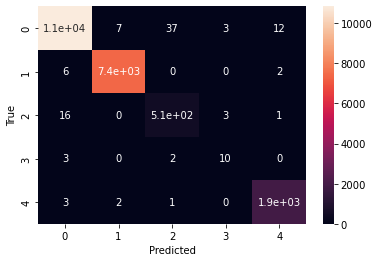

In [20]:
clf = RandomForestClassifier(n_estimators=225, min_samples_split=2, min_samples_leaf=1, max_features="sqrt", max_depth=250, bootstrap=True, n_jobs=-1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
metricas(y_test,y_pred)

In [21]:
# Predictions for submission
y_pred=clf.predict(X_testing)
with open('submissionRT.csv', 'w') as file:
    file.write("SampleID,Class\n")
    for i in range(0,44556):
        file.write("{},{}\n".format(i,y_pred[i]))

## Bagging

Métricas de avaliação:
Accuracy:  0.9871213582867066 
Precision:  0.9894033203980668 
Recall:  0.9871213582867066 
F1:  0.9879755893954959

Matriz de confusão:


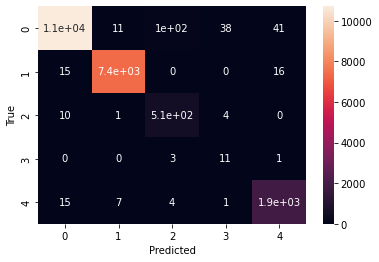

In [22]:
bagging = BaggingClassifier(KNeighborsClassifier(n_neighbors=5), max_samples=0.5, max_features=0.5)
clf = bagging.fit(X_train, y_train)
y_pred = clf.predict(X_test)

metricas(y_test,y_pred)

## Decision Tree

Métricas de avaliação:
Accuracy:  0.9921377580551805 
Precision:  0.9925192733631147 
Recall:  0.9921377580551805 
F1:  0.9922828368628056

Matriz de confusão:


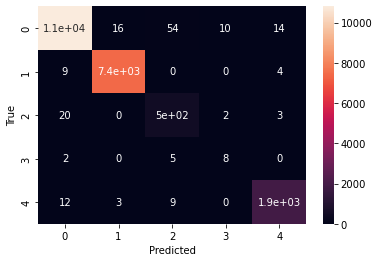

In [23]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metricas(y_test,y_pred)

In [24]:
# Predictions for submission
y_pred=clf.predict(X_testing)
with open('submissionDT.csv', 'w') as file:
    file.write("SampleID,Class\n")
    for i in range(0,44556):
        file.write("{},{}\n".format(i,y_pred[i]))

## Extra Tree

Métricas de avaliação:
Accuracy:  0.9935365618367741 
Precision:  0.9936897121319798 
Recall:  0.9935365618367741 
F1:  0.9935964306438917

Matriz de confusão:


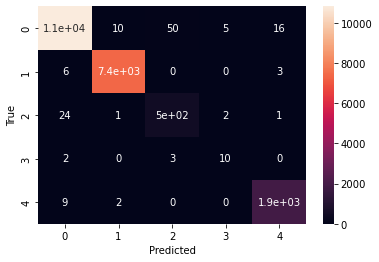

In [25]:
clf = ExtraTreesClassifier(n_estimators=225, min_samples_split=2, min_samples_leaf=1, max_features="sqrt", max_depth=250, bootstrap=True, n_jobs=-1)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

metricas(y_test,y_pred)

## Majority Voting

Métricas de avaliação:
Accuracy:  0.9907389542735867 
Precision:  0.9916845724376755 
Recall:  0.9907389542735867 
F1:  0.9910973840236826

Matriz de confusão:


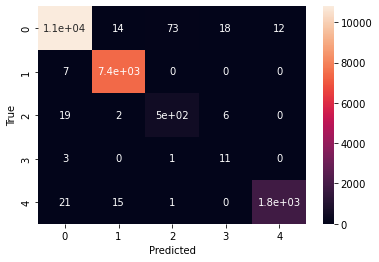

In [26]:
clf1 = KNeighborsClassifier()
clf2 = RandomForestClassifier(n_estimators=225, min_samples_split=2, min_samples_leaf=1, max_features="sqrt", max_depth=250, bootstrap=True, n_jobs=-1)
clf3 = GaussianNB()

clf = VotingClassifier(estimators=[('kn', clf1), ('rf', clf2), ('nb', clf3)], voting='hard')

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
metricas(y_test,y_pred)

## Boosting

Métricas de avaliação:
Accuracy:  0.6697858383175767 
Precision:  0.9009847592919251 
Recall:  0.6697858383175767 
F1:  0.7338278031554869

Matriz de confusão:


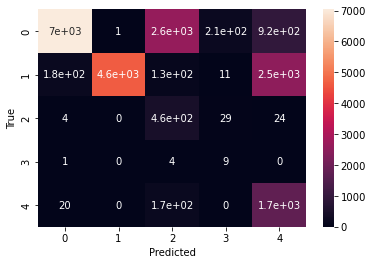

In [17]:
clf = AdaBoostClassifier(n_estimators=225, learning_rate=0.01)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

metricas(y_test,y_pred)

## Gradient Boosting

Métricas de avaliação:
Accuracy:  0.9879895813235577 
Precision:  0.9896690539877442 
Recall:  0.9879895813235577 
F1:  0.9884954097808268

Matriz de confusão:


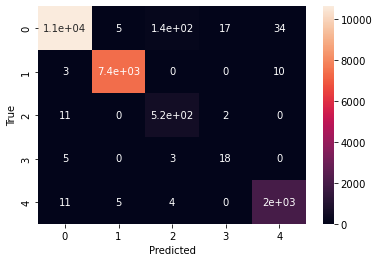

In [23]:
clf = GradientBoostingClassifier(n_estimators=225, learning_rate=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metricas(y_test,y_pred)

## Extreme Gradient Boosting

Métricas de avaliação:
Accuracy:  0.9951765386841598 
Precision:  0.9952888746280918 
Recall:  0.9951765386841598 
F1:  0.9951873733894263

Matriz de confusão:


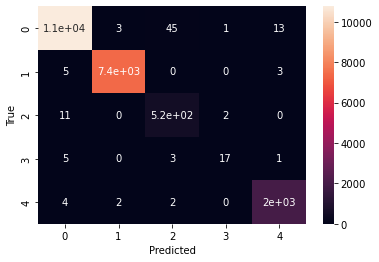

In [24]:
clf = XGBClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

metricas(y_test,y_pred)

## Stacking

Métricas de avaliação:
Accuracy:  0.9939706733551997 
Precision:  0.9939395051493336 
Recall:  0.9939706733551997 
F1:  0.9939310816006129

Matriz de confusão:


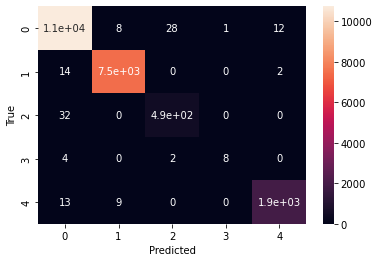

In [18]:
estimators = [('rf', RandomForestClassifier(n_estimators=225, min_samples_split=2, min_samples_leaf=1, max_features="sqrt", max_depth=250, bootstrap=True, n_jobs=-1)),
              ('kn', KNeighborsClassifier())]

clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

metricas(y_test,y_pred)

# Support Vector Machine (SVM)

Métricas de avaliação:
Accuracy:  0.977233262589234 
Precision:  0.9793732429279352 
Recall:  0.977233262589234 
F1:  0.9777790503501552

Matriz de confusão:


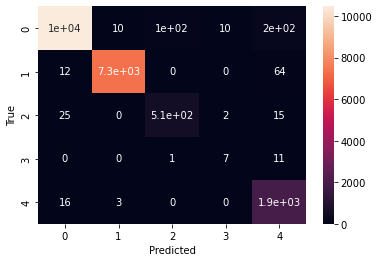

In [16]:
# Criar um classificador svm
#clf = svm.SVC()
#clf = svm.SVC(kernel='linear')  # Linear Kernel -> piores resultados

#clf=Pipeline([("svm_clf",svm.SVC(kernel="rbf",C=3,gamma=10)),])
clf=Pipeline([("scaler",StandardScaler()),("svm_clf",svm.SVC(kernel="rbf",C=3,gamma=10)),])

# Treinar o modelo
clf.fit(X_train, y_train)

# Fazer as previsões 
y_pred = clf.predict(X_test)

# Avaliar 
metricas(y_test,y_pred)

In [17]:
# Predictions for submission
y_pred=clf.predict(X_testing)
with open('submissionSVMov.csv', 'w') as file:
    file.write("SampleID,Class\n")
    for i in range(0,44556):
        file.write("{},{}\n".format(i,y_pred[i]))

# Artificial Neural Network

In [16]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(5, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               6656      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0

In [17]:
y_train_ann = tf.keras.utils.to_categorical(y_train, num_classes=5)
y_test_ann = tf.keras.utils.to_categorical(y_test, num_classes=5)

print(y_train_ann.shape)
print(y_test_ann.shape)

(215680, 5)
(20732, 5)


## Adam

In [18]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('val_accuracy') > 0.996):    
            self.model.stop_training = True
callback = myCallback()

In [20]:
epochs=20
batch_size=32

history = model.fit(X_train, y_train_ann, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test_ann), callbacks=[callback])

Epoch 1/20
6718/6718 [==============================] - 10s 1ms/step - loss: 0.5631 - accuracy: 0.7860 - val_loss: 0.2457 - val_accuracy: 0.9083
Epoch 2/20
6718/6718 [==============================] - 9s 1ms/step - loss: 0.2569 - accuracy: 0.9208 - val_loss: 0.1919 - val_accuracy: 0.9350
Epoch 3/20
6718/6718 [==============================] - 8s 1ms/step - loss: 0.1979 - accuracy: 0.9406 - val_loss: 0.1772 - val_accuracy: 0.9405
Epoch 4/20
6718/6718 [==============================] - 8s 1ms/step - loss: 0.1664 - accuracy: 0.9508 - val_loss: 0.1640 - val_accuracy: 0.9435
Epoch 5/20
6718/6718 [==============================] - 8s 1ms/step - loss: 0.1457 - accuracy: 0.9571 - val_loss: 0.1277 - val_accuracy: 0.9570
Epoch 6/20
6718/6718 [==============================] - 8s 1ms/step - loss: 0.1313 - accuracy: 0.9610 - val_loss: 0.1268 - val_accuracy: 0.9553
Epoch 7/20
6718/6718 [==============================] - 8s 1ms/step - loss: 0.1208 - accuracy: 0.9642 - val_loss: 0.1131 - val_accuracy

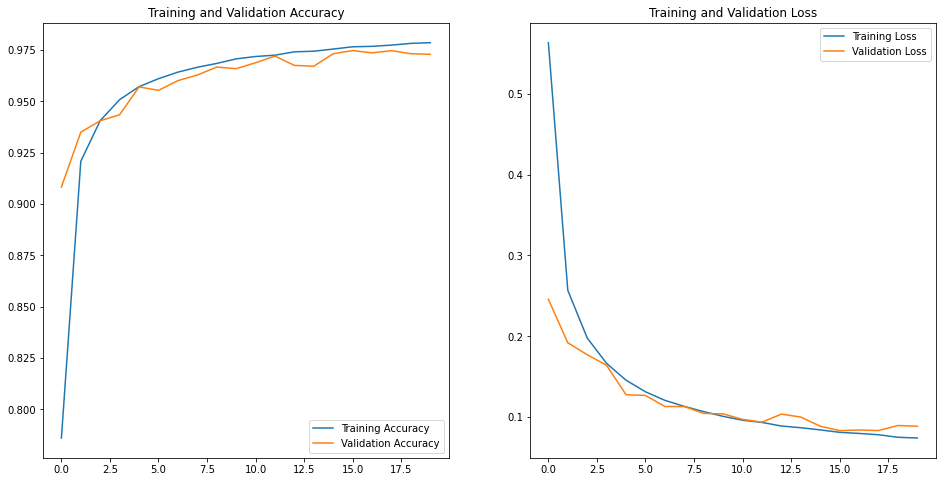

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
predicted_labels = model.predict(X_testing)
predicted_labels = np.argmax(np.round(predicted_labels), axis=1)
index = np.arange(0,44556)

df = pd.DataFrame({"SampleID":index, "Class":predicted_labels})
df.to_csv('submissionANN.csv', index=False)

## SGD

In [19]:
opt = tf.keras.optimizers.SGD(learning_rate=0.0001,momentum=0.9,nesterov=True)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('val_accuracy') > 0.996):    
            self.model.stop_training = True
callback = myCallback()

In [21]:
epochs=100
batch_size=32

history = model.fit(X_train, y_train_ann, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test_ann), callbacks=[callback])

Epoch 1/100
6736/6736 [==============================] - 9s 1ms/step - loss: 1.3332 - accuracy: 0.4608 - val_loss: 0.7792 - val_accuracy: 0.8368
Epoch 2/100
6736/6736 [==============================] - 8s 1ms/step - loss: 0.8223 - accuracy: 0.6990 - val_loss: 0.6133 - val_accuracy: 0.7631
Epoch 3/100
6736/6736 [==============================] - 11s 2ms/step - loss: 0.6415 - accuracy: 0.7862 - val_loss: 0.5206 - val_accuracy: 0.7720
Epoch 4/100
6736/6736 [==============================] - 12s 2ms/step - loss: 0.5396 - accuracy: 0.8231 - val_loss: 0.4702 - val_accuracy: 0.7872
Epoch 5/100
6736/6736 [==============================] - 11s 2ms/step - loss: 0.4684 - accuracy: 0.8460 - val_loss: 0.3990 - val_accuracy: 0.8387
Epoch 6/100
6736/6736 [==============================] - 10s 1ms/step - loss: 0.4139 - accuracy: 0.8645 - val_loss: 0.3534 - val_accuracy: 0.8702
Epoch 7/100
6736/6736 [==============================] - 8s 1ms/step - loss: 0.3731 - accuracy: 0.8775 - val_loss: 0.3168 - va

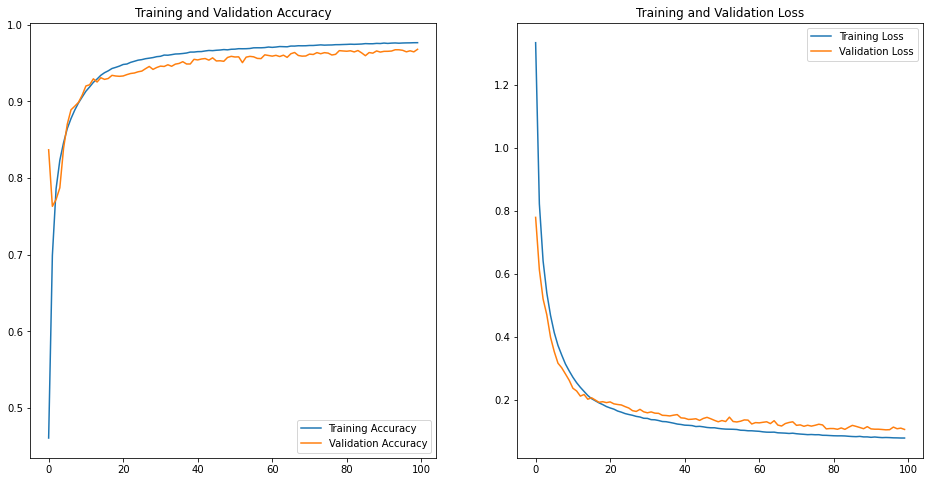

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Adagrad

In [18]:
opt = tf.keras.optimizers.Adagrad(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('val_accuracy') > 0.996):    
            self.model.stop_training = True
callback = myCallback()

In [20]:
epochs=100
batch_size=32

history = model.fit(X_train, y_train_ann, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test_ann), callbacks=[callback])

Epoch 1/100
6740/6740 [==============================] - 11s 2ms/step - loss: 1.2439 - accuracy: 0.4603 - val_loss: 0.9811 - val_accuracy: 0.7528
Epoch 2/100
6740/6740 [==============================] - 10s 1ms/step - loss: 0.8234 - accuracy: 0.7112 - val_loss: 0.6524 - val_accuracy: 0.8034
Epoch 3/100
6740/6740 [==============================] - 8s 1ms/step - loss: 0.6615 - accuracy: 0.7789 - val_loss: 0.5198 - val_accuracy: 0.8211
Epoch 4/100
6740/6740 [==============================] - 8s 1ms/step - loss: 0.5728 - accuracy: 0.8119 - val_loss: 0.4482 - val_accuracy: 0.8377
Epoch 5/100
6740/6740 [==============================] - 7s 1ms/step - loss: 0.5187 - accuracy: 0.8322 - val_loss: 0.4110 - val_accuracy: 0.8503
Epoch 6/100
6740/6740 [==============================] - 7s 1ms/step - loss: 0.4842 - accuracy: 0.8450 - val_loss: 0.3822 - val_accuracy: 0.8660
Epoch 7/100
6740/6740 [==============================] - 7s 1ms/step - loss: 0.4549 - accuracy: 0.8550 - val_loss: 0.3611 - val_

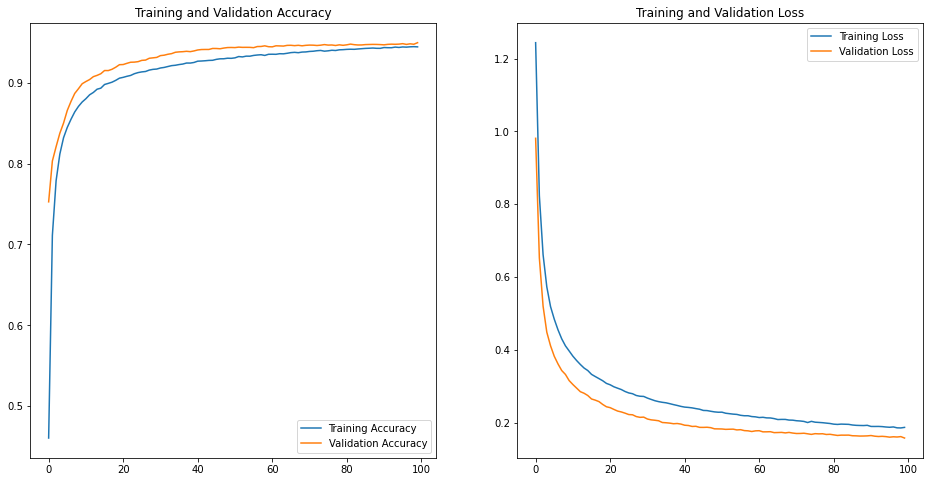

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()